<a href="https://colab.research.google.com/github/harodjoseph/Tugas-Besar-SKO/blob/main/TUBES_SKO(_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Pt = 10*np.log(0.0001) #Daya output (dB)
p = 20 #Range panjang kabel optik 20 km
R = 0.80 #Responsifity
q = 1.6*(10**-19) #muatan elektron dalam Coulomb
Idark = 2*(10**-9) #Dark current
B = np.arange(0.5*(10**9),20*(10**9),1000) #Bandwidth 0.5-20 GHz
Teff = 290 #Suhu efektif dalam Kelvin
K = 1.38*(10**-23) #konstanta Stefann-Boltzmann
Rload = 50 #Resistansi ekivalen
e = 2.71828 #Bilangan euler
pi = 3.14

In [ ]:
#Daya sinyal yang diterima upstream (Pru) dalam Watt
Pru = 10**((Pt-(p*0.4)-(5*0.1)-(2*0.75)-5)/10)
print(Pru)
#Daya sinyal yang diterima downstream (Prd) dalam Watt
Prd = 10**((Pt-(p*0.3)-(5*0.1)-(2*0.75)-5)/10)
print(Prd)

1.9483170361268523e-11
3.087874407313469e-11


In [ ]:
#Signal Power upstream (SPu) dalam A
SPu = 2*((Pru*R)**2)
print(SPu)
#Signal Power downstream (SPd) dalam A
SPd = 2*((Prd*R)**2)
print(SPd)

4.8588022697755175e-22
1.220475949483713e-21


In [ ]:
#Total Noise Power upstream (NSu) dalam A
NSu = (2*q*Idark*B)+(2*q*(2*Pru*R)*B)+((4*K*Teff*B)/Rload)
print(NSu)
#Total Noise Power downstream (NSd) dalam A
NSd = (2*q*Idark*B)+(2*q*(2*Prd*R)*B)+((4*K*Teff*B)/Rload)
print(NSd)

[1.60080325e-13 1.60080645e-13 1.60080965e-13 ... 6.40321204e-12
 6.40321236e-12 6.40321268e-12]
[1.60080328e-13 1.60080648e-13 1.60080968e-13 ... 6.40321216e-12
 6.40321248e-12 6.40321280e-12]


In [ ]:
#Signal to Noise Ratio upstream (SNRu) dalam dB
SNRu = 10*np.log(SPu/NSu)
print(SNRu)
#Signal to Noise Ratio downstream (SNRd) dalam dB
SNRd = 10*np.log(SPd/NSd)
print(SNRd)

[-196.1297941  -196.1298141  -196.1298341  ... -233.01858715 -233.01858765
 -233.01858815]
[-186.91945391 -186.91947391 -186.91949391 ... -223.80824696 -223.80824746
 -223.80824796]


In [ ]:
#Q upstream (Qu)
Qu = (10**(SNRu/20))/2
print(Qu)
#Q downstream (Qd)
Qd = (10**(SNRd/20))/2
print(Qd)

[7.80693025e-11 7.80691227e-11 7.80689430e-11 ... 1.11696778e-12
 1.11696772e-12 1.11696766e-12]
[2.25422524e-10 2.25422005e-10 2.25421486e-10 ... 3.22520747e-12
 3.22520728e-12 3.22520710e-12]


In [ ]:
#Bit error rate upstream (BERu)
BERu = (1/np.sqrt(2*pi))*((e**((Qu**2)/-2))/Qu)
print(BERu)
#Bit error rate downstream (BERd)
BERd = (1/np.sqrt(2*pi))*((e**((Qd**2)/-2))/Qd)
print(BERd)

[5.11140012e+09 5.11141189e+09 5.11142366e+09 ... 3.57256000e+11
 3.57256020e+11 3.57256041e+11]
[1.77020217e+09 1.77020625e+09 1.77021033e+09 ... 1.23726441e+11
 1.23726448e+11 1.23726456e+11]


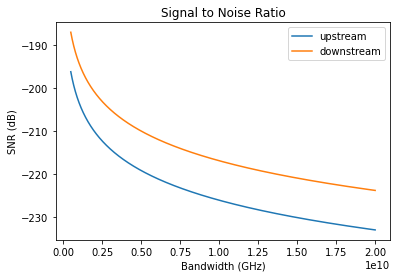

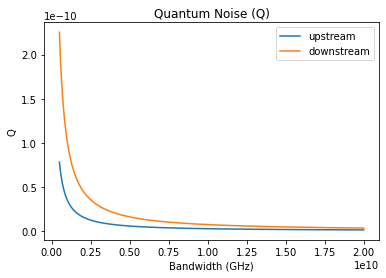

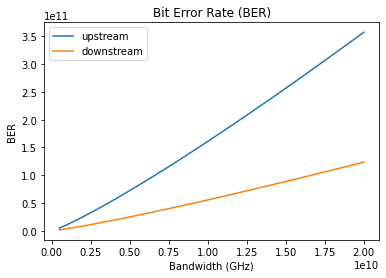

In [ ]:
#Grafik SNR
plt.plot(B, SNRu, label="upstream")
plt.plot(B, SNRd, label="downstream")
plt.title('Signal to Noise Ratio')
plt.xlabel('Bandwidth (GHz)')
plt.ylabel('SNR (dB)')
plt.legend()
plt.show()
#Grafik Q
plt.plot(B, Qu, label="upstream")
plt.plot(B, Qd, label="downstream")
plt.title('Quantum Noise (Q)')
plt.xlabel('Bandwidth (GHz)')
plt.ylabel('Q')
plt.legend()
plt.show()
#Grafik Bit error rate
plt.plot(B, BERu, label="upstream")
plt.plot(B, BERd, label="downstream")
plt.title('Bit Error Rate (BER)')
plt.xlabel('Bandwidth (GHz)')
plt.ylabel('BER')
plt.legend()
plt.show()